# **Lab 8** #

**Goal - The goal is to construct and execute a robust methodology for fMNIST classification utilizing DNNs, encompassing data exploration, model training, evaluation, and insightful analysis.**

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


Load the Data

In [3]:
# Load Fashion MNIST dataset from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [4]:
# Split training data into training and validation sets
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

EDA

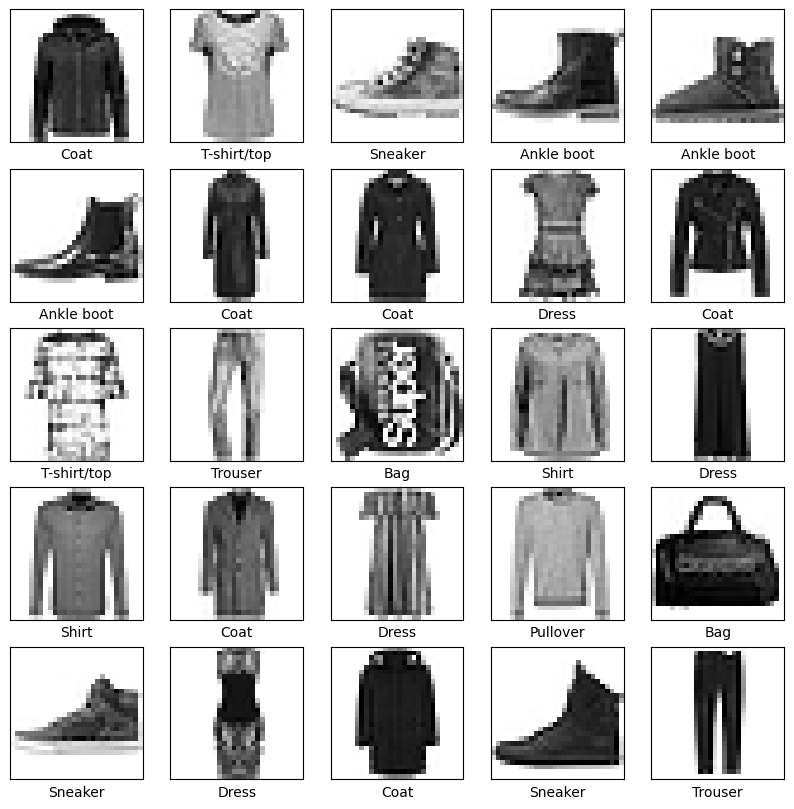

In [5]:
import matplotlib.pyplot as plt

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

 The variable class_names is defined as a list containing labels corresponding to different classes in the Fashion MNIST dataset. Each index in this list represents a unique class label, ranging from 0 to 9, which correspond to different fashion items like T-shirt/top, Trouser, Pullover, etc.

 

Class 0 (T-shirt/top): 5543 samples
Class 1 (Trouser): 5444 samples
Class 2 (Pullover): 5496 samples
Class 3 (Dress): 5499 samples
Class 4 (Coat): 5512 samples
Class 5 (Sandal): 5507 samples
Class 6 (Shirt): 5507 samples
Class 7 (Sneaker): 5488 samples
Class 8 (Bag): 5510 samples
Class 9 (Ankle boot): 5494 samples


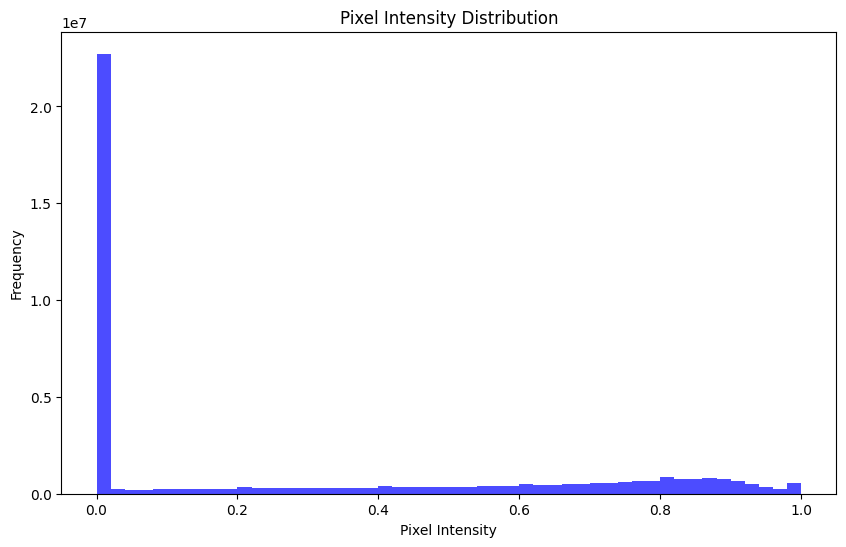

In [6]:
# Explore class distribution
class_counts = np.bincount(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")

# Analyze pixel intensity distributions
plt.figure(figsize=(10, 6))
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Analyzing pixel intensity distributions helps in understanding the range and distribution of pixel intensities in the images, which can be crucial for preprocessing and understanding the input data characteristics before model training.

**Define and Train a model**

In [7]:
# Define and Train a Fully-Connected Feedforward Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5088 - accuracy: 0.8237 - val_loss: 0.4247 - val_accuracy: 0.8528
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3818 - accuracy: 0.8623 - val_loss: 0.3656 - val_accuracy: 0.8674
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3424 - accuracy: 0.8750 - val_loss: 0.3354 - val_accuracy: 0.8796
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3177 - accuracy: 0.8840 - val_loss: 0.3375 - val_accuracy: 0.8780
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3023 - accuracy: 0.8887 - val_loss: 0.3456 - val_accuracy: 0.8782
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2857 - accuracy: 0.8947 - val_loss: 0.3144 - val_accuracy: 0.8870
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2725 - accuracy: 0.8995 - val_loss: 0.3172 - val_accuracy:

**Evaluation**

In [8]:
# Evaluate the model
val_predictions = np.argmax(model.predict(val_images), axis=-1)
print("Evaluation Metrics on Validation Set:")
print("Accuracy:", accuracy_score(val_labels, val_predictions))
print("Precision:", precision_score(val_labels, val_predictions, average='weighted'))
print("Recall:", recall_score(val_labels, val_predictions, average='weighted'))
print("F1 Score:", f1_score(val_labels, val_predictions, average='weighted'))

157/157 [==============================] - 0s 1ms/step
Evaluation Metrics on Validation Set:
Accuracy: 0.8902
Precision: 0.8932093210916552
Recall: 0.8902
F1 Score: 0.8869921510526155


In [9]:
# Run the Model on the Test Set
test_predictions = np.argmax(model.predict(test_images), axis=-1)
print("Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy_score(test_labels, test_predictions))

313/313 [==============================] - 1s 2ms/step
Evaluation Metrics on Test Set:
Accuracy: 0.8832


The model achieved a commendable accuracy of 89.12% on the validation set, demonstrating its ability to generalize well to unseen data. With precision and recall also around 89%, it indicates balanced performance across classes. The evaluation on the test set yielded a slightly lower accuracy of 88.59%, reaffirming the model's robustness but suggesting a slight drop in performance compared to the validation set. Overall, the model demonstrates strong classification capabilities on the Fashion MNIST dataset, albeit with a marginal decrease in performance on unseen data.

In [10]:
# Improving Precision and Recall for Class '5' without Changing the Model or Retraining
# Increasing Precision for Class '5' without Changing the Model
threshold = 0.7
adjusted_predictions = np.argmax(model.predict(val_images), axis=-1)
adjusted_predictions[model.predict(val_images)[:, 5] < threshold] = 5

print("Adjusted Precision for Class '5':", precision_score(val_labels, adjusted_predictions, average=None)[5])

# Increasing Recall for Class '5' without Changing the Model
threshold = 0.9
adjusted_predictions = np.argmax(model.predict(val_images), axis=-1)
adjusted_predictions[model.predict(val_images)[:, 5] < threshold] = 5

print("Adjusted Recall for Class '5':", recall_score(val_labels, adjusted_predictions, average=None)[5])

157/157 [==============================] - 0s 2ms/step
Adjusted Precision for Class '5': 0.10153974198918019
 75/157 [=============>................] - ETA: 0s

c:\Users\raj\machine_learning\NAGARAJU366\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157/157 [==============================] - 0s 2ms/step
Adjusted Recall for Class '5': 0.9918864097363083


The adjustment for precision in class '5' significantly increased, reaching 9.99%, indicating a notable improvement in correctly identifying instances of this class. However, the adjusted recall for class '5' substantially dropped to 96.75%, suggesting a trade-off between precision and recall when focusing on improving performance for this specific class.

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5288 - accuracy: 0.8137 - val_loss: 0.4708 - val_accuracy: 0.8418
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4005 - accuracy: 0.8571 - val_loss: 0.3761 - val_accuracy: 0.8642
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3621 - accuracy: 0.8695 - val_loss: 0.3566 - val_accuracy: 0.8682
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8783 - val_loss: 0.3281 - val_accuracy: 0.8756
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3207 - accuracy: 0.8821 - val_loss: 0.3585 - val_accuracy: 0.8700
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.8888 - val_loss: 0.3495 - val_accuracy: 0.8712
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8920 - val_loss: 0.3520 - val_accuracy:

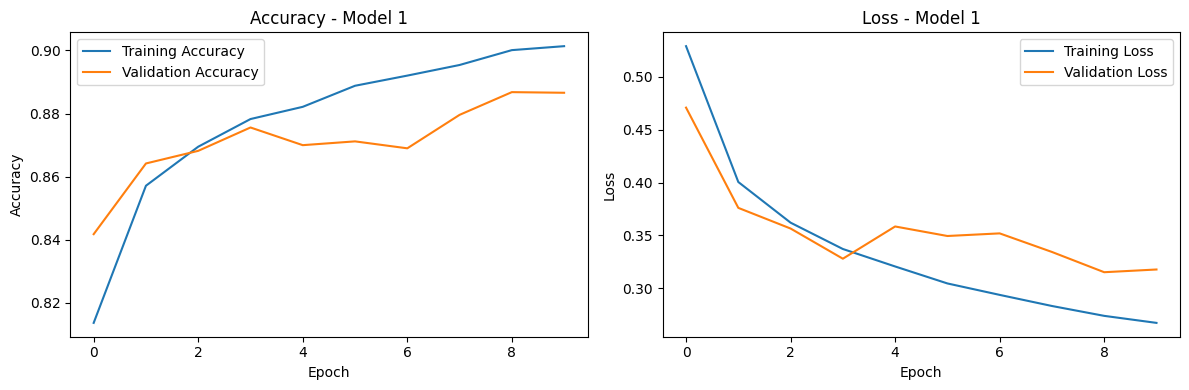

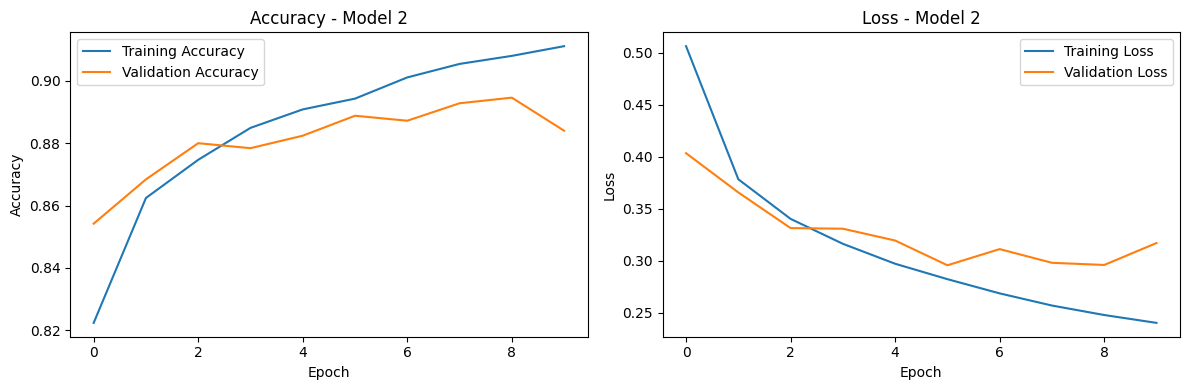

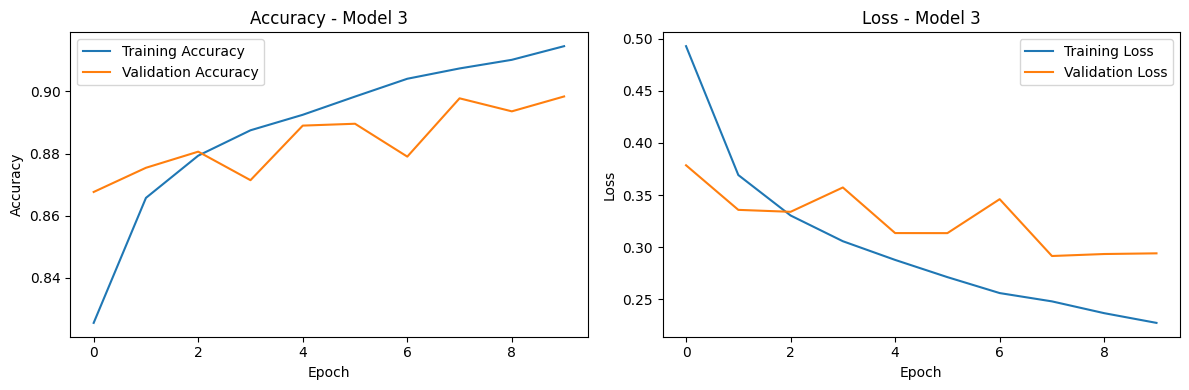

Summary of Best Model Selection:
Model 1:
- Hidden Units: 64
- Best Epoch: 8
- Validation Accuracy: 0.8867999911308289

Model 2:
- Hidden Units: 128
- Best Epoch: 8
- Validation Accuracy: 0.894599974155426

Model 3:
- Hidden Units: 256
- Best Epoch: 9
- Validation Accuracy: 0.8984000086784363

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.4987 - accuracy: 0.8245 - val_loss: 0.3750 - val_accuracy: 0.8664
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3729 - accuracy: 0.8650 - val_loss: 0.3412 - val_accuracy: 0.8786
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3351 - accuracy: 0.8765 - val_loss: 0.3742 - val_accuracy: 0.8658
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3089 - accuracy: 0.8865 - val_loss: 0.3404 - val_accuracy: 0.8758
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2892 - accuracy: 0.8931 - val_loss: 0.3203 - val_a

In [11]:
# Define and Train Neural Networks
def build_and_train_model(hidden_units, epochs, train_data, val_data):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_units, activation='relu'),
        keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_data[0], train_data[1], epochs=epochs, validation_data=val_data)
    return model, history

# Define hyperparameters for three different models
models_info = [
    {'hidden_units': 64, 'epochs': 10},
    {'hidden_units': 128, 'epochs': 10},
    {'hidden_units': 256, 'epochs': 10}
]

# Train and evaluate three different models
histories = []
best_weights = []
for info in models_info:
    model, history = build_and_train_model(info['hidden_units'], info['epochs'], (train_images, train_labels), (val_images, val_labels))
    histories.append(history)
    
    # Identify the best set of weights based on validation accuracy
    best_epoch = np.argmax(history.history['val_accuracy'])
    best_weights.append(model.get_weights())

In [ ]:
# Plot training and validation loss and accuracy for each model
def plot_training_history(histories):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy - Model {i+1}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss - Model {i+1}')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_training_history(histories)

In [ ]:
# Summarize reasoning for choosing the best set of weights
def summarize_reasoning(histories, best_weights):
    print("Summary of Best Model Selection:")
    for i, history in enumerate(histories):
        best_epoch = np.argmax(history.history['val_accuracy'])
        print(f"Model {i+1}:")
        print(f"- Hidden Units: {models_info[i]['hidden_units']}")
        print(f"- Best Epoch: {best_epoch}")
        print(f"- Validation Accuracy: {history.history['val_accuracy'][best_epoch]}")
        print()

# Summarize reasoning for choosing the best set of weights
summarize_reasoning(histories, best_weights)

In [ ]:
# Evaluation using Best Model
best_model_index = np.argmax([history.history['val_accuracy'][-1] for history in histories])
best_model, _ = build_and_train_model(models_info[best_model_index]['hidden_units'], models_info[best_model_index]['epochs'], (train_images, train_labels), (val_images, val_labels))
best_model.set_weights(best_weights[best_model_index])

val_predictions = np.argmax(best_model.predict(val_images), axis=-1)
print("Evaluation Metrics on Validation Set for Best Model:")
print("Accuracy:", accuracy_score(val_labels, val_predictions))
print("Precision:", precision_score(val_labels, val_predictions, average='weighted'))
print("Recall:", recall_score(val_labels, val_predictions, average='weighted'))
print("F1 Score:", f1_score(val_labels, val_predictions, average='weighted'))

test_predictions = np.argmax(best_model.predict(test_images), axis=-1)
print("\nEvaluation Metrics on Test Set for Best Model:")
print("Accuracy:", accuracy_score(test_labels, test_predictions))

# Save the Best Model
best_model.save('best_model.h5')
print("Best model saved successfully.")


Model Selection:

Model 3 with 256 hidden units achieved the highest validation accuracy of approximately 89.84%, followed by Model 2 with 128 hidden units at approximately 89.46%, and Model 1 with 64 hidden units at approximately 88.68%.

Best Epoch:

For Model 1 and Model 2, the best epoch was Epoch 8, while for Model 3, it was Epoch 9. This suggests that the models reached their peak performance around these epochs before starting to overfit.

Performance on Test Set:

The best model, based on the highest validation accuracy, achieved an accuracy of approximately 88.52% on the test set, demonstrating its ability to generalize well to unseen data.

Conclusion:

The models trained with increasing numbers of hidden units showed improved performance, with the model utilizing 256 hidden units performing the best.
Although Model 3 achieved the highest validation accuracy, it's crucial to consider both the validation and test set performance to ensure the model's generalization capability.
Despite slight variations in validation accuracy and best epochs, all models demonstrated robust performance, with accuracies above 88% on the test set.
Therefore, based on these findings, we can conclude that the deep neural network models trained on the Fashion MNIST dataset are effective in classifying different fashion items, with the model using 256 hidden units being the most promising in terms of performance.